In [20]:

#makes jupyter notebook screen wider
#from IPython.core.display import HTML, display
#display(HTML("<style>.container { width:80% !important; }</style>"))

from osgeo import gdal
import numpy as np
import pandas as pd
import bokeh.plotting as bp
import holoviews as hv
import geoviews as gv
import datashader as ds
import rasterio as rio
import xarray as xr
import cartopy as crs
import rasterio as rio
from holoviews.operation import contours
from holoviews.operation.datashader import datashade, aggregate
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno


#my code
from interactive_profiler import define_boundaries


#importing the data
name = "Mandakini_fullProfileMC_forced_0.45_3_1258909000_10_80_281_for_Arc.csv" #Set file name
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/" #Set path to data
df = pd.read_csv(path+name)

Test_data = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/"
Test = gdal.Open(Test_data + "/Mandakini.bil")#Get raster data
M_DEM = Test.ReadAsArray()

In [3]:
from interactive_profiler import define_boundaries
x_range, y_range = define_boundaries(df, 10000)

xmin = min(x_range)
ymin = min(y_range)
xmax = max(x_range)
ymax = max(y_range)
test = (xmin, ymin, xmax, ymax)

test

(306316.5722, 3362194.102, 338128.85340000002, 3387078.852)

In [21]:
#Import raster data in various ways.
raster_data = rio.open(Test_data + "/Mandakini.bil")



#Convert the .bil raster to and xarray dataarray
foo = xr.DataArray(M_DEM, dims=['x', 'y'])#, dims=['elevation'])
foo.coords

xr_dataset = gv.Dataset(M_DEM, #crs=crs.PlateCarree(), 
                        kdims=['latitude','longitude'],
                        vdims=['elevation'])
xr_dataset


:Dataset   [latitude,longitude]   (elevation)

:DynamicMap   []
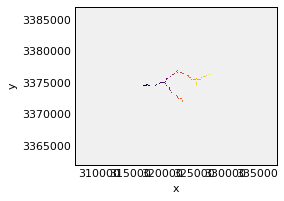

In [13]:
#Plot stream data as geoviews dataset
%opts Raster [xrotation=20] Points (color='r')[xrotation=20]
#hv.notebook_extension('bokeh', width=995)
hv.notebook_extension()

stream_dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
#dem_data = gv.Dataset(M_DEM, kdims=['x', 'y'])
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=100, y_sampling=100, width=1200, height=660)

shaded = datashade(hv.Points(stream_dataset),  cmap=inferno, aggregator=ds.mean('elevation'), **shade_defaults)
shaded

(306316.5722, 3387078.852, 338128.85340000002, 3362194.102)


:Layout
   .Raster.I :Raster   [x,y]   (z)
   .Points.I :Points   [x,y]   (elevation,chi,flow_distance)
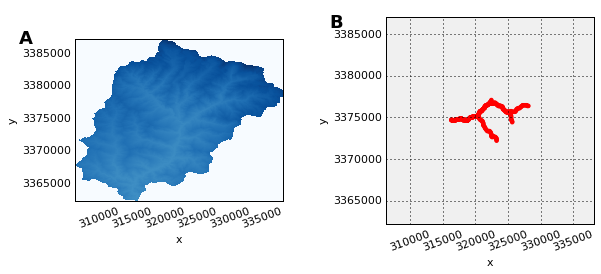

In [35]:
%opts Raster [xrotation=20] Points (color='r')[xrotation=20]

#points = df['x'],df['y']

stream = hv.Points(stream_dataset)

#raster imported with Rasterio
dem = hv.Raster(raster_data)(style={'cmap':'inferno'}) #, kdims=['x', 'y'], vdims=['elevation'])


#stream#.datatype
#stream.select[x=]
#stream.data[0:10]

#df.head()
#Convert from Pandas to Xarray dataset
#points_test = xr.Dataset.from_dataframe(df)

#Convert the .bil raster to and xarray dataarray
#foo = xr.DataArray(M_DEM)

#kdims = ['x', 'y']
#vdims = ['elevation']#, 'flow_distance', 'chi']


#xr_dataset = gv.Dataset(points_test, kdims=kdims, vdims=vdims, crs=crs.PlateCarree())
#xr_raster = gv.Dataset(foo, kdims=kdims, vdims=vdims)




kdims = ['x', 'y']

#raster imported with numpy and gdal
ras = hv.Raster(M_DEM)(style={'cmap':'Blues'})

ras.extents = (xmin, ymax, xmax, ymin) #something is backwards in my "Define boundaries" function
print(ras.extents)

stream.extents =(xmin, ymin, xmax, ymax)


#test1 = hv.Points(stream.data[:])
#test1.extents = (x0,y1,x1,y0)
ras + stream
# test1_map = gv.Raster['x', 'latitude']) * gv.Points([test1])
# temp_map + temp_curve

#pnt = hv.Points()
#mand = hv.HoloMap(ras, kdims=kdims)
#ras * stream + stream
#((ras * hv.HLine(y=330)).hist() + ras.sample(y=330))

/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3387129.22599, top=3387129.22599
  'bottom=%s, top=%s') % (bottom, top))


:DynamicMap   []
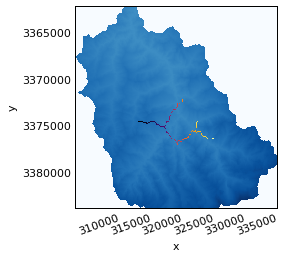

In [8]:
import holoviews as hv
import geoviews as gv
from bokeh.models import ColumnDataSource
hv.notebook_extension()

dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=100, y_sampling=100, width=1200, height=660)

shaded = datashade(hv.Points(dataset),  cmap=inferno, aggregator=ds.mean('elevation'), **shade_defaults)

ras*shaded

In [9]:
#using holoviews to plot up raster and points

#%output backend='bokeh'

#%opts Overlay [width=600 height=300 xaxis=None yaxis=None] 
#%opts Points (size=0.005 cmap='inferno') [tools=['hover'] color_index=2]


stream = gv.Dataset(df, kdims=['x', 'y', 'elevation', 'chi'])

streams = stream.to(gv.Points, kdims=['x', 'y'],
                    vdims=['elevation', 'chi'], crs=crs.PlateCarree())






xr_dataset = gv.Dataset(M_DEM, crs=crs.PlateCarree(),
                        kdims=['latitude','longitude'],
                        vdims=['elevation'])
xr_dataset

#ras2 = xr_dataset.to(gv.Image, ['longitude', 'latitude']) * gf.coastline
#ras2[::2]







kdims = ['x', 'y']

ras = hv.Raster(M_DEM)(style={'cmap':'Blues'})

ras.extents = (x0, y1, x1, y0) #something is backwards in my "Define boundaries" function
stream.extents =(x0,y1,x1,y0)


ras2 = hv.Raster(raster_data)


AttributeError: 'module' object has no attribute 'PlateCarree'